# Thư viện sử dụng

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report



In [2]:
# Đọc dữ liệu
df = pd.read_csv('seattle-weather.csv')

In [3]:
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


+ Dữ liệu thời tiết thành phố Seattle - Mỹ
- date : năm tháng ngày
- precipitation : Lượng mưa (mm)
- temp-max : Nhiệt độ cao nhất (°C)
- temp_min : Nhiệt độ thấp nhất (°C)
- wind : Gió (m/s)
- weather : Thời tiết

- Dữ liệu thời tiết trong vòng 4 năm (2012-2015)

In [4]:
df.shape

(1461, 6)

- rain: mưa
- sun: nắng
- fog: sương mù
- drizzle: mưa phùn
- snow: tuyết

Text(0.5, 1.0, 'Count of Weather Categories')

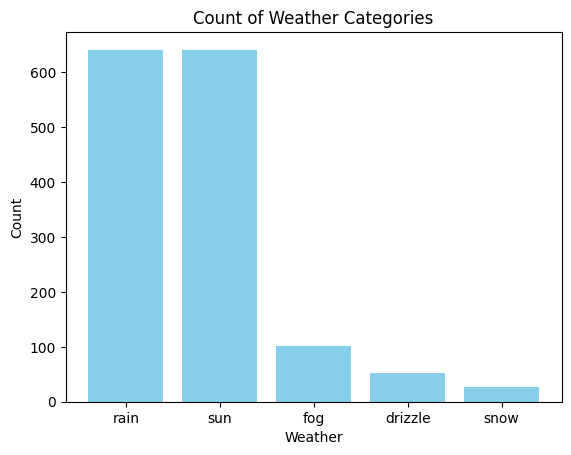

In [5]:
weather_counts = df['weather'].value_counts()
plt.bar(weather_counts.index, weather_counts.values, color='skyblue')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count of Weather Categories')

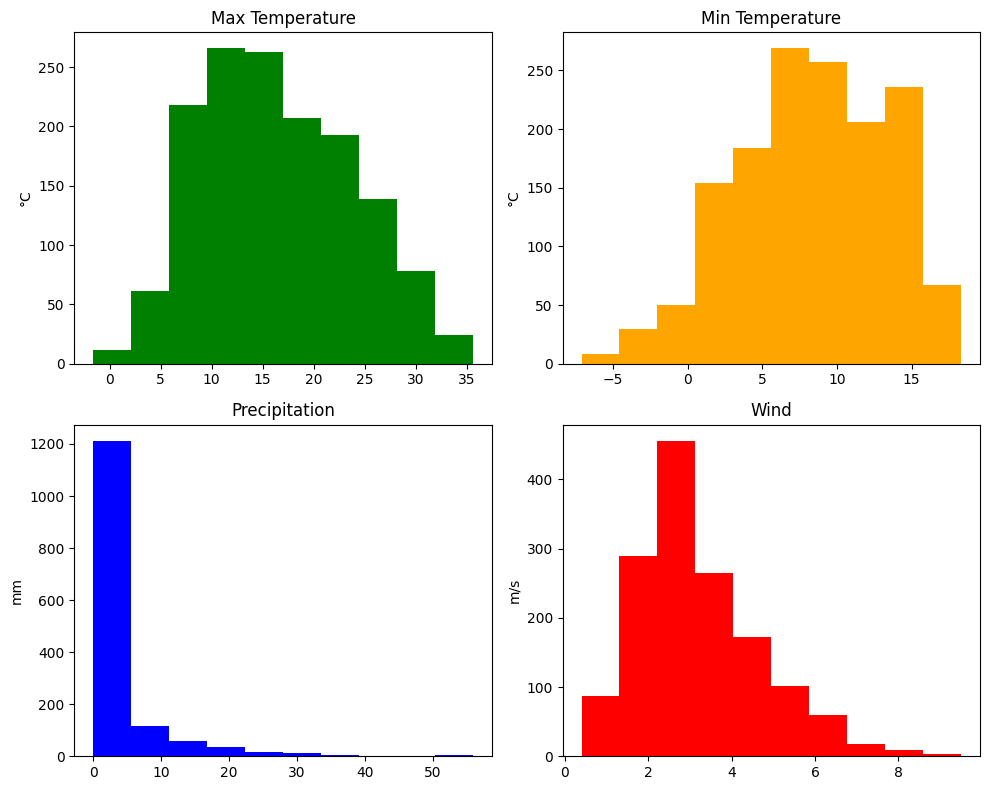

In [6]:
# Tạo một figure và các axes
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Vẽ histogram cho từng cột lên từng axes
df["temp_max"].plot(kind="hist", ax=axs[0, 0], title="Max Temperature", color='green')
axs[0, 0].set_ylabel("°C")

df["temp_min"].plot(kind="hist", ax=axs[0, 1], title="Min Temperature", color='orange')
axs[0, 1].set_ylabel("°C")

df["precipitation"].plot(kind="hist", ax=axs[1, 0], title="Precipitation", color='blue')
axs[1, 0].set_ylabel("mm")

df["wind"].plot(kind="hist", ax=axs[1, 1], title="Wind", color='red')
axs[1, 1].set_ylabel("m/s")

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [7]:
df.iloc[:,1:4]

,precipitation,temp_max,temp_min
0,0.0,12.8,5.0
1,10.9,10.6,2.8
2,0.8,11.7,7.2
3,20.3,12.2,5.6
4,1.3,8.9,2.8
...,...,...,...
1456,8.6,4.4,1.7
1457,1.5,5.0,1.7
1458,0.0,7.2,0.6
1459,0.0,5.6,-1.0


<Axes: >

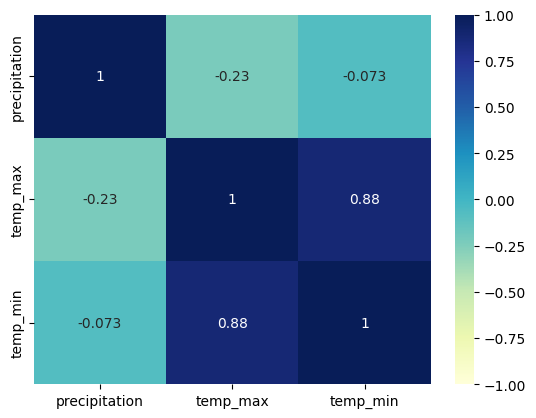

In [8]:

corr_matrix = df.iloc[:,1:4].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)

In [9]:
df.isnull().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

# Các mô hình học máy

In [10]:
data = df.drop(["date"], axis = 1)

In [11]:
y = data['weather']
x = data[['temp_max', 'temp_min', 'precipitation', 'wind']]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [16]:
len(x_train), len(x_test)

(1168, 293)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel = rfmodel.fit(x_train, y_train)
rfscore = rfmodel.score(x_test, y_test)
print("Accuracy of KNN model is:",rfscore)


Accuracy of KNN model is: 0.8122866894197952


In [58]:
y_pred = rfmodel.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     drizzle       0.17      0.11      0.13         9
         fog       0.67      0.08      0.14        25
        rain       0.93      0.91      0.92       120
        snow       0.40      0.25      0.31         8
         sun       0.78      0.96      0.86       131

    accuracy                           0.82       293
   macro avg       0.59      0.46      0.47       293
weighted avg       0.80      0.82      0.79       293



- Optimize performance

In [29]:
rfmodel = RandomForestClassifier(criterion='entropy')
rfmodel = rfmodel.fit(x_train, y_train)
rfscore = rfmodel.score(x_test, y_test)
print("Accuracy of KNN model is:",rfscore)

Accuracy of KNN model is: 0.8191126279863481


In [46]:

acc = []
for n_estimators in range(1,100): 
    model = RandomForestClassifier(n_estimators=n_estimators)

    # train model 
    model = model.fit(x_train, y_train)


    # Evaluate model : accuracy
    accuracy = model.score(x_test, y_test)
    acc.append(accuracy)

Text(0.5, 1.0, 'Độ chính xác của Random Forest với n_estimators khác nhau')

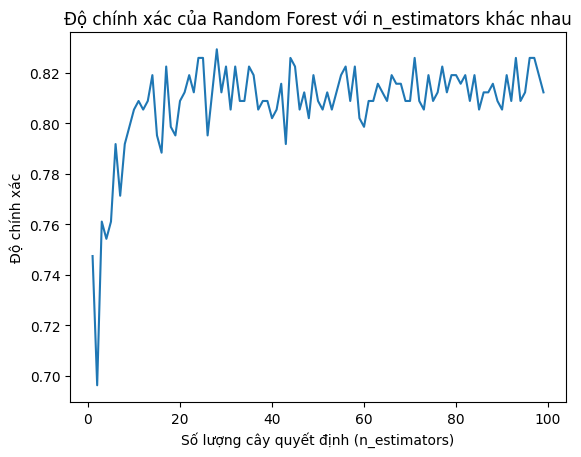

In [49]:
# Tạo biểu đồ đường
plt.plot(range(1,100), acc)

# Thiết lập nhãn và tiêu đề
plt.xlabel("Số lượng cây quyết định (n_estimators)")
plt.ylabel("Độ chính xác")
plt.title("Độ chính xác của Random Forest với n_estimators khác nhau")

- Mô hình KNN

In [50]:
knn = KNeighborsClassifier()
knnmodel = knn.fit(x_train, y_train)
knnscore = knn.score(x_test, y_test)
print("Accuracy of KNN model is:",knnscore)

Accuracy of KNN model is: 0.7815699658703071


In [51]:
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     drizzle       0.33      0.11      0.17         9
         fog       0.38      0.20      0.26        25
        rain       0.88      0.88      0.88       120
        snow       0.00      0.00      0.00         8
         sun       0.75      0.89      0.81       131

    accuracy                           0.78       293
   macro avg       0.47      0.42      0.43       293
weighted avg       0.74      0.78      0.75       293



C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

In [55]:
knnacc = []
for k in range(1,50): 
    model = KNeighborsClassifier(n_neighbors=k)

    # train model 
    model = model.fit(x_train, y_train)


    # Evaluate model : accuracy
    knnaccuracy = model.score(x_test, y_test)
    knnacc.append(knnaccuracy)

Text(0.5, 1.0, 'KNN Accuracy vs k')

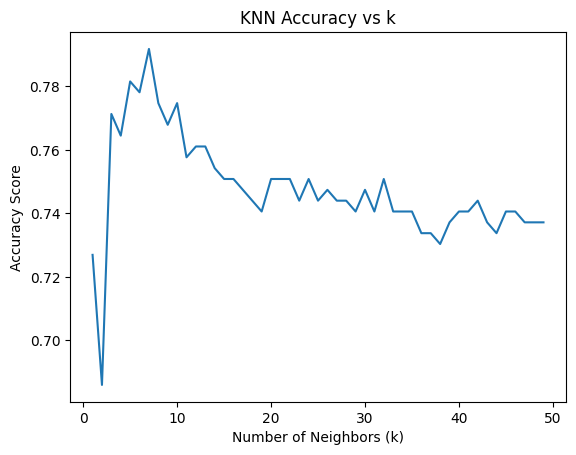

In [57]:
# Tạo biểu đồ đường
plt.plot(range(1,50), knnacc)

# Thiết lập nhãn và tiêu đề
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("KNN Accuracy vs k")

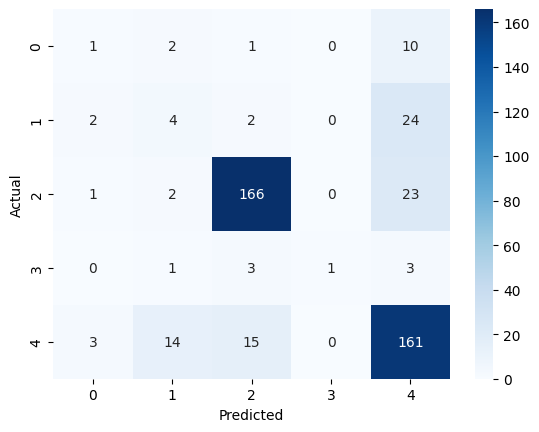

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:

misclassified_indexes = np.where(y_test != y_pred)[0]
print(f'Misclassified indexes: {misclassified_indexes}')


Misclassified indexes: [  6   7  14  17  18  21  24  28  32  33  44  47  48  62  65  71  73  75
  76  79  81  86  88  96  97 103 108 111 114 115 116 117 118 126 133 134
 140 144 149 150 152 156 158 167 172 180 190 191 194 196 198 200 205 214
 237 238 239 240 253 255 262 264 267 268 277 280 283 290 293 296 300 307
 308 323 326 327 329 333 336 342 344 346 347 352 357 359 366 373 375 379
 380 381 382 386 397 398 399 403 404 413 418 422 424 426 427 438]


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, x_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores):.2f}')


Cross-validation scores: [0.77073171 0.71707317 0.73039216 0.73039216 0.74509804]
Mean cross-validation score: 0.74
